<a href="https://colab.research.google.com/github/akilash-gaddam/NLP/blob/main/NLP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving movie_review.csv to movie_review.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import re

df=pd.read_csv('movie_review.csv')
print(df.head())

   fold_id cv_tag  html_id  sent_id  \
0        0  cv000    29590        0   
1        0  cv000    29590        1   
2        0  cv000    29590        2   
3        0  cv000    29590        3   
4        0  cv000    29590        4   

                                                text  tag  
0  films adapted from comic books have had plenty...  pos  
1  for starters , it was created by alan moore ( ...  pos  
2  to say moore and campbell thoroughly researche...  pos  
3  the book ( or " graphic novel , " if you will ...  pos  
4  in other words , don't dismiss this film becau...  pos  


In [ ]:
df_reviews = df.groupby(['cv_tag', 'tag'])['text'].apply(lambda x: ' '.join(x)).reset_index()
print(df_reviews.head())

  cv_tag  tag                                               text
0  cv000  neg  plot : two teen couples go to a church party ,...
1  cv000  pos  films adapted from comic books have had plenty...
2  cv001  neg  the happy bastard's quick movie review damn th...
3  cv001  pos  every now and then a movie comes along from a ...
4  cv002  neg  it is movies like these that make a jaded movi...


In [ ]:
def clean_text(text):
  text = text.lower()
  text = re.sub(r'[^a-zA-Z\s]','',text)
  return text
df_reviews['cleaned_text']=df_reviews['text'].apply(clean_text)
print(df_reviews.head())

  cv_tag  tag                                               text  \
0  cv000  neg  plot : two teen couples go to a church party ,...   
1  cv000  pos  films adapted from comic books have had plenty...   
2  cv001  neg  the happy bastard's quick movie review damn th...   
3  cv001  pos  every now and then a movie comes along from a ...   
4  cv002  neg  it is movies like these that make a jaded movi...   

                                        cleaned_text  
0  plot  two teen couples go to a church party  d...  
1  films adapted from comic books have had plenty...  
2  the happy bastards quick movie review damn tha...  
3  every now and then a movie comes along from a ...  
4  it is movies like these that make a jaded movi...  


In [ ]:
pos_corpus = df_reviews[df_reviews['tag'] == 'pos']['cleaned_text'].tolist()
print(pos_corpus)
neg_corpus = df_reviews[df_reviews['tag'] == 'neg']['cleaned_text'].tolist()
print(neg_corpus)


['films adapted from comic books have had plenty of success  whether theyre about superheroes  batman  superman  spawn   or geared toward kids  casper  or the arthouse crowd  ghost world   but theres never really been a comic book like from hell before  for starters  it was created by alan moore  and eddie campbell   who brought the medium to a whole new level in the mid s with a part series called the watchmen  to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd  the book  or  graphic novel   if you will  is over  pages long and includes nearly  more that consist of nothing but footnotes  in other words  dont dismiss this film because of its source  if you can get past the whole comic book thing  you might find another stumbling block in from hells directors  albert and allen hughes  getting the hughes brothers to direct this seems almost as ludicrous as casting carrot top in  well  anythi

In [ ]:
def get_top_tfidf_features(corpus, n=15):
    # Initialize TF-IDF Vectorizer with English stop words removal
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(corpus)

    # Get the average TF-IDF score for each term across all documents in the corpus
    importance = tfidf_matrix.mean(axis=0).tolist()[0]
    features = vectorizer.get_feature_names_out()

    # Create a DataFrame and sort by score
    importance_df = pd.DataFrame({'term': features, 'score': importance})
    return importance_df.sort_values(by='score', ascending=False).head(n)

In [ ]:
top_15_pos = get_top_tfidf_features(pos_corpus)
# print("top 15 positive reviews are :\n" ,top_15_pos)
print(top_15_pos.to_string(index=False))
top_15_neg = get_top_tfidf_features(neg_corpus)
print("top 15 negative reviews are :\n")
print(top_15_neg.to_string(index=False))

      term    score
      film 0.048849
     movie 0.031662
      like 0.020859
      just 0.017914
     story 0.017276
      good 0.017183
     films 0.016707
      time 0.015818
      life 0.015641
characters 0.015600
 character 0.014828
       way 0.013310
    really 0.013153
      does 0.013077
    movies 0.013073
top 15 negative reviews are :

      term    score
      film 0.046695
     movie 0.038800
      like 0.023303
      just 0.021650
      good 0.017817
       bad 0.017223
      time 0.016760
     story 0.015862
characters 0.015576
     films 0.015266
      plot 0.015237
 character 0.014890
    really 0.014666
      make 0.013582
    action 0.013524


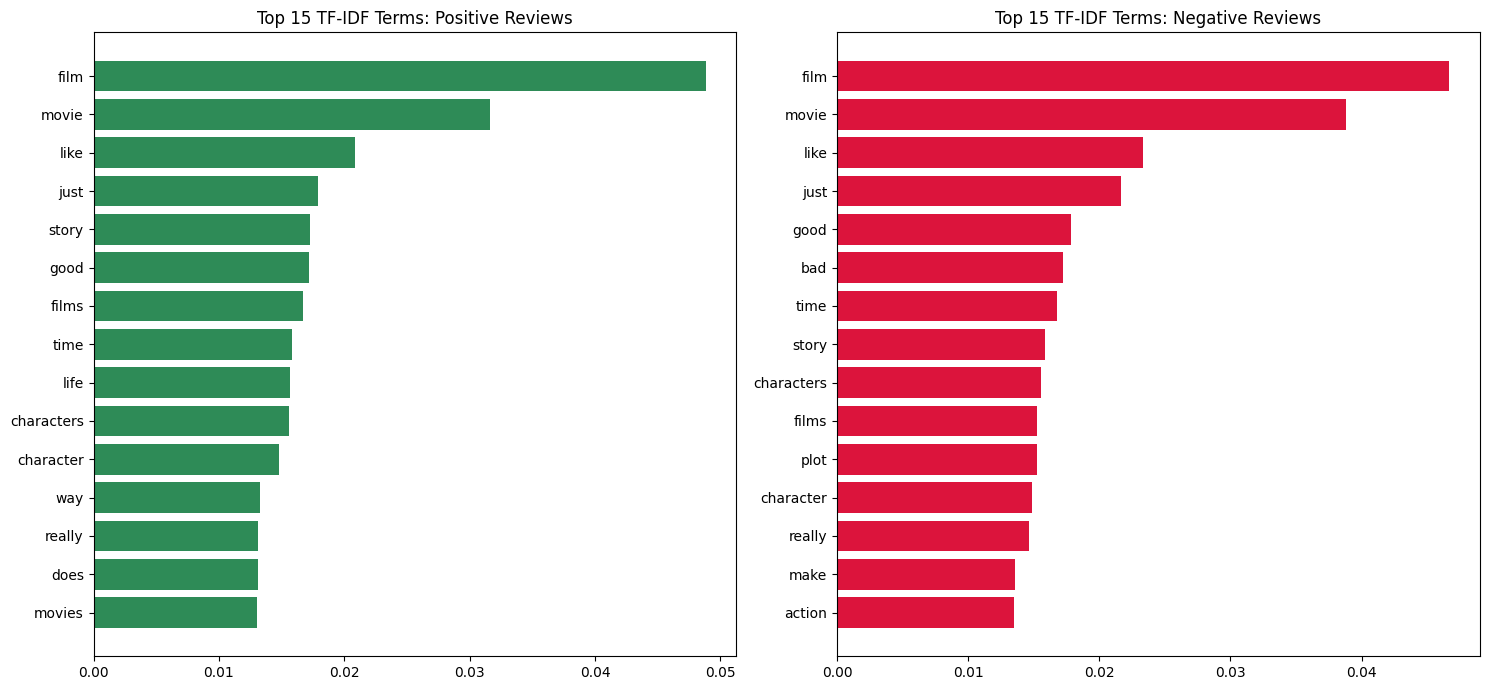

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))


axes[0].barh(top_15_pos['term'], top_15_pos['score'], color='seagreen')
axes[0].set_title('Top 15 TF-IDF Terms: Positive Reviews')
axes[0].invert_yaxis()


axes[1].barh(top_15_neg['term'], top_15_neg['score'], color='crimson')
axes[1].set_title('Top 15 TF-IDF Terms: Negative Reviews')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()